## Name: Gopani Kenil G. 
## Roll No: CE049 
## ID: 19CEUOS080
##  Lab-6

#### Task 1 : Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
# Loading Dataset
dataset = datasets.load_digits()

x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
y = dataset.target

In [4]:
# Scaling Data
scaler = StandardScaler()

x = scaler.fit_transform(x)
print(x.shape)

(1797, 64)


In [5]:
# without PCA - Train naive bayes

# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=49)

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.825

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.80      0.81      0.80        43
           2       1.00      0.52      0.69        44
           3       0.76      0.89      0.82        28
           4       0.97      0.82      0.89        39
           5       0.74      0.94      0.83        34
           6       0.95      0.97      0.96        36
           7       0.70      0.97      0.82        32
           8       0.67      0.81      0.73        37
           9       0.89      0.65      0.75        37

    accuracy                           0.82       360
   macro avg       0.84      0.84      0.83       360
weighted avg       0.85      0.82      0.82       360



In [6]:
# With PCA - Train naive bayes

pca = PCA(n_components=25)

x_pca = pca.fit_transform(x)
print("Shape of x_pca : ", x_pca.shape)

# Splitting data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.20, random_state=49)

# Train model
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train_pca)

y_pred_pca =  gnb.predict(x_test_pca)

# Accuracy
print()
print("Accuracy: ", metrics.accuracy_score(y_test_pca, y_pred_pca))
print()
print(metrics.classification_report(y_test_pca, y_pred_pca))

Shape of x_pca :  (1797, 25)

Accuracy:  0.9138888888888889

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.84      0.98      0.90        43
           2       0.86      0.82      0.84        44
           3       0.80      0.86      0.83        28
           4       1.00      0.90      0.95        39
           5       1.00      0.94      0.97        34
           6       0.97      0.92      0.94        36
           7       0.91      0.97      0.94        32
           8       0.94      0.92      0.93        37
           9       0.87      0.89      0.88        37

    accuracy                           0.91       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.91      0.91       360



#### TASK- 2 : Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations.

In [7]:
# Load IRIS Dataset
dataset = datasets.load_iris()

x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

print("Features : \n\n", x)
print()
print("Labels : \n\n", y)

Features : 

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Labels : 

 [0 0 0 0 0 0 

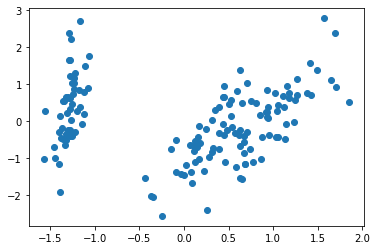

In [8]:
pca = PCA(n_components=2, whiten=True)

x_pca = pca.fit_transform(x)

x_pca = pd.DataFrame(data=x_pca, columns=['PC1','PC2'])
plt.scatter(x_pca.PC1, x_pca.PC2)
plt.show()


#### TASK - 3 : Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system

In [9]:
# Splitting Data
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.20, random_state=49)

# Train model
gnb = GaussianNB()
gnb.fit(x_train_pca, y_train_pca)

y_pred_pca =  gnb.predict(x_test_pca)

# Accuracy
print()
print("Accuracy: ", metrics.accuracy_score(y_test_pca, y_pred_pca))
print()
print(metrics.classification_report(y_test_pca, y_pred_pca))


Accuracy:  0.8333333333333334

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.69      0.90      0.78        10
           2       0.89      0.67      0.76        12

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.85      0.83      0.83        30

